## Initial EDA on my library music features

* **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **Acousticness**: A measure from 0.0 to 1.0 of whether the track is acoustic.
* **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* **Instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
* **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='noahschumacher', api_key='IIUnPL7kfY6cnZtC3e7g')
plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline  
%config InlineBackend.figure_format='retina'

In [39]:
## Loading in pickled music lib and pickled music lib features
songs = pickle.load(open('data/noah_mlib.p', 'rb'))
features = pickle.load(open('data/noah_mlib_features.p', 'rb'))

## Initial Inspection of Song Features

In [40]:
feat_df = pd.DataFrame.from_records(features).set_index('id')
feat_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.285489,0.624381,3.085675e+05,0.567412,0.393741,5.239000,0.177176,-9.585279,0.524000,0.067461,118.879635,3.922000,0.340643
std,0.314118,0.177084,1.088634e+05,0.203319,0.370623,3.585908,0.162065,3.579514,0.499674,0.067716,24.197213,0.366128,0.233081
min,0.000004,0.000000,3.833300e+04,0.005720,0.000000,0.000000,0.023100,-33.838000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018000,0.508000,2.298812e+05,0.425750,0.004723,2.000000,0.092275,-11.433000,0.000000,0.034900,107.011500,4.000000,0.148000
50%,0.155000,0.645500,2.863840e+05,0.583500,0.300000,5.000000,0.112000,-9.023000,1.000000,0.045400,120.010000,4.000000,0.298000
75%,0.526750,0.765000,3.739612e+05,0.715000,0.801750,8.000000,0.184250,-7.137500,1.000000,0.066025,125.850750,4.000000,0.505250
max,0.995000,0.985000,1.009000e+06,0.993000,0.966000,11.000000,0.969000,-1.786000,1.000000,0.546000,219.331000,5.000000,0.972000


In [41]:
feat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 69ZGaXg5BV9HRxOgexbu6N to 2CVeqoap0AwLbdjWr6Rraq
Data columns (total 17 columns):
acousticness        1000 non-null float64
analysis_url        1000 non-null object
danceability        1000 non-null float64
duration_ms         1000 non-null int64
energy              1000 non-null float64
instrumentalness    1000 non-null float64
key                 1000 non-null int64
liveness            1000 non-null float64
loudness            1000 non-null float64
mode                1000 non-null int64
speechiness         1000 non-null float64
tempo               1000 non-null float64
time_signature      1000 non-null int64
track_href          1000 non-null object
type                1000 non-null object
uri                 1000 non-null object
valence             1000 non-null float64
dtypes: float64(9), int64(4), object(4)
memory usage: 140.6+ KB


In [42]:
## Setting index as song_id, converting duration to seconds, removing useless rows
feat_df['duration'] = np.round(feat_df['duration_ms'] / 1000)
feat_df.drop(['track_href', 'type', 'uri', 'analysis_url', 'duration_ms'], axis=1, inplace=True)
feat_df.sample(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
id,,,,,,,,,,,,,
69ZGaXg5BV9HRxOgexbu6N,0.05520,0.786,0.921,0.00178,0,0.0629,-6.842,1,0.1010,118.373,4,0.6210,381.0
5pU9azu0VQIUk2nTUVxwxY,0.93800,0.710,0.312,0.90900,1,0.1090,-11.451,0,0.0857,169.955,4,0.2500,216.0
2vKa6i0SBDa6NzYgnOpqRu,0.00519,0.542,0.611,0.48000,8,0.0945,-7.500,1,0.0260,87.017,4,0.0706,266.0


In [43]:
## Plotting out the histograms of each feature for music lib
def plot_hists(df):
    fig, axs = plt.subplots(5, 3, figsize=(12,12))
    axis = axs.flatten()

    counter = 0
    for col in df.columns:

        axis[counter].hist(df[col], bins=15)
        axis[counter].set_title(col)
        counter += 1

        axis[counter].set_ylabel("Song Count")
        plt.tight_layout()

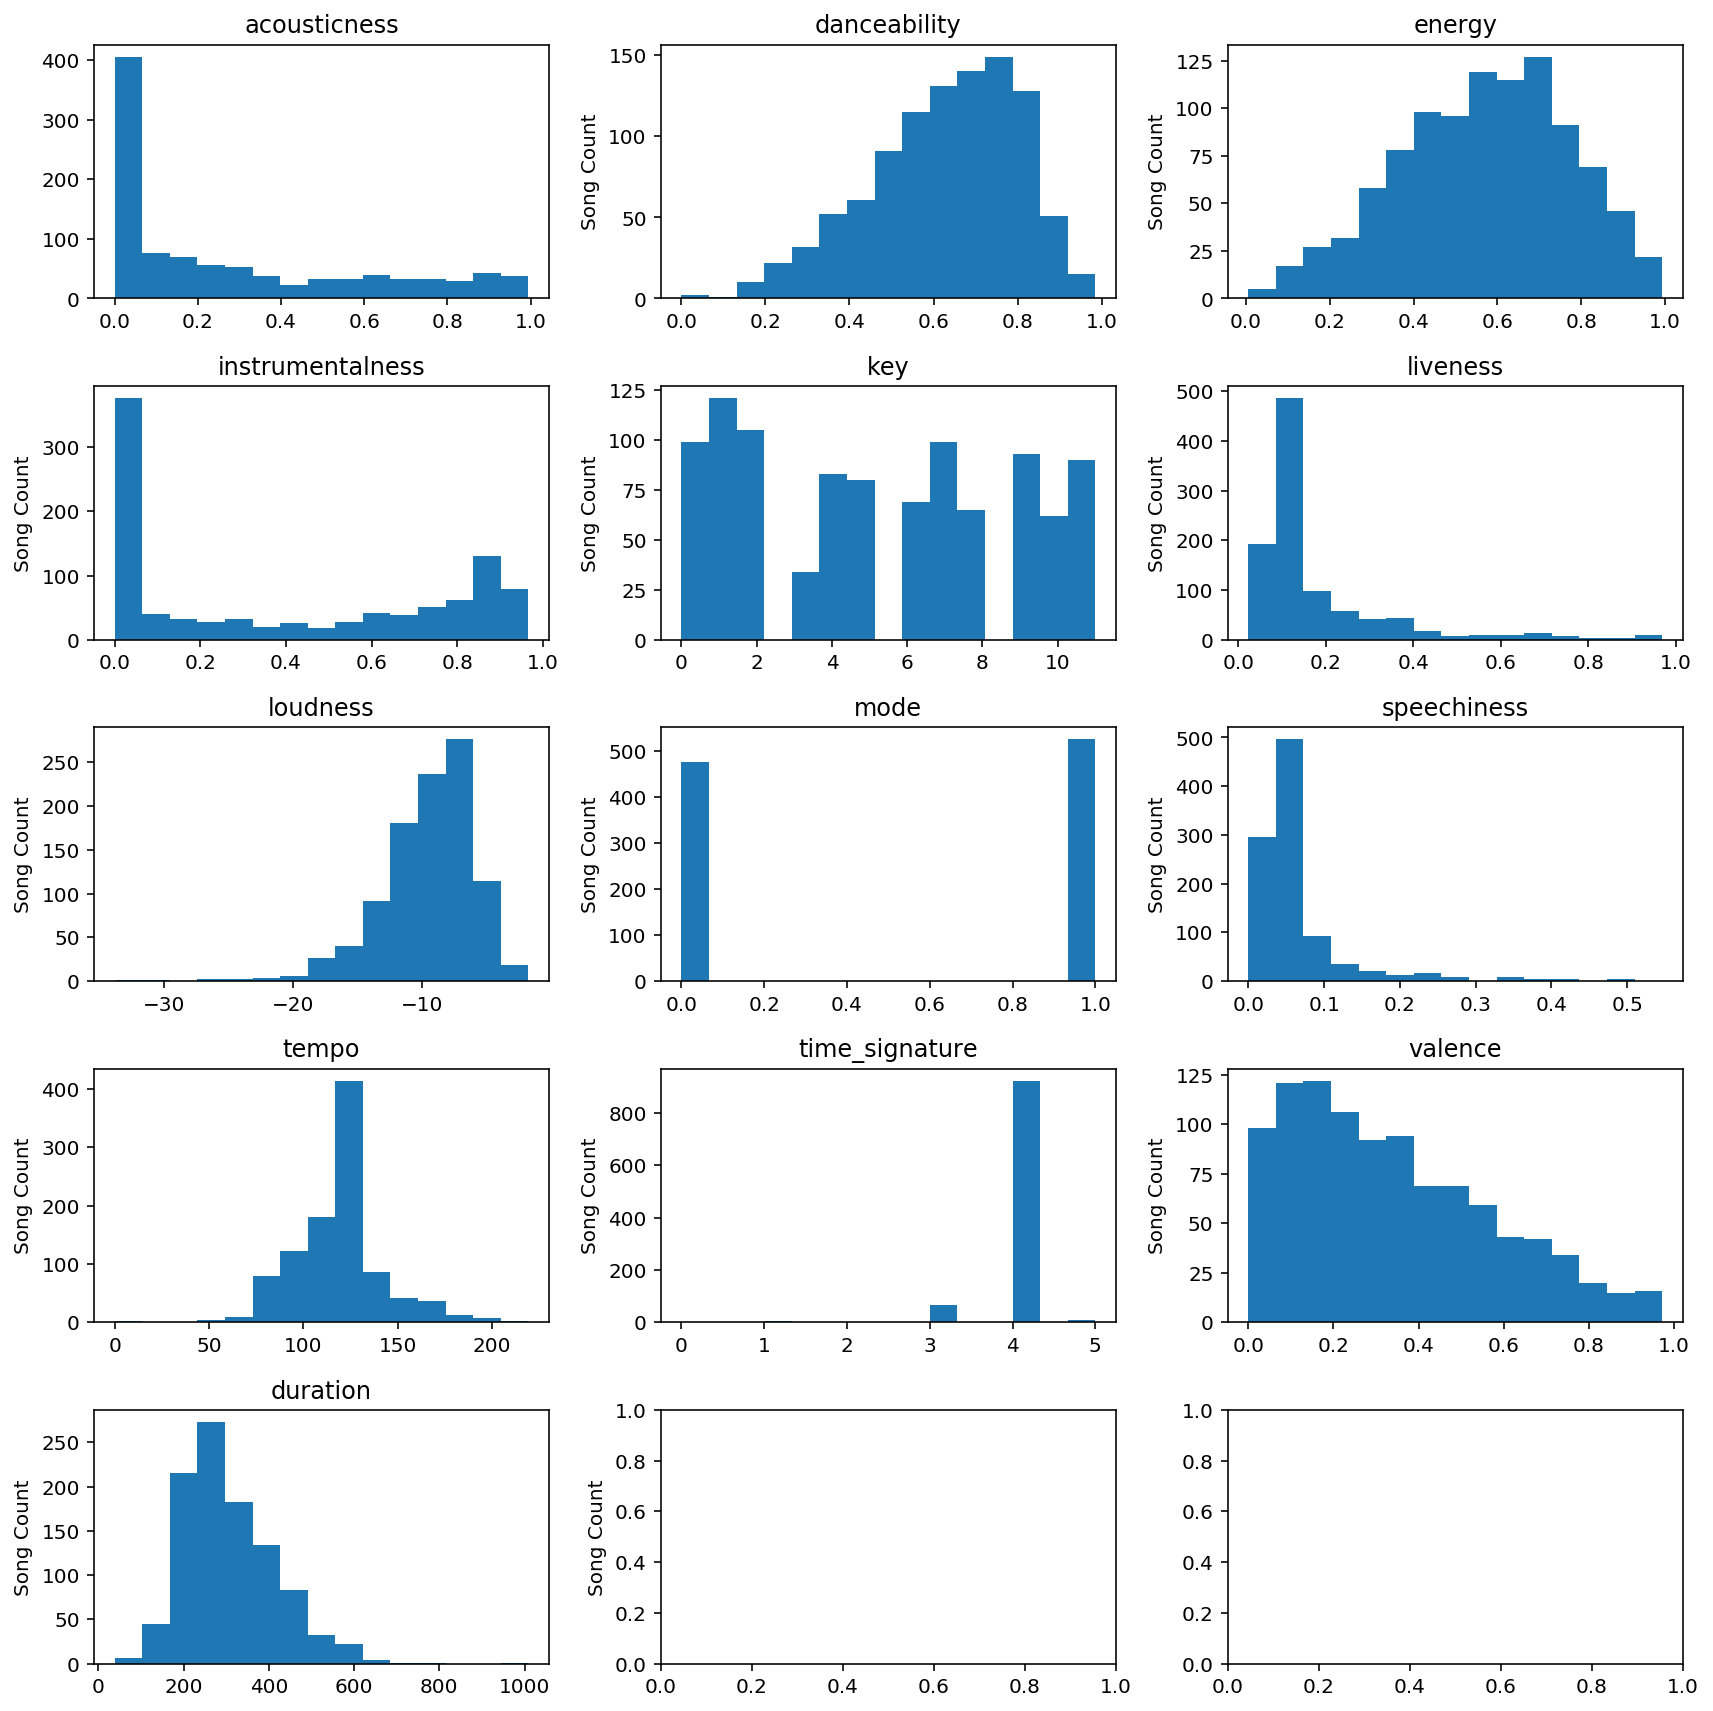

In [44]:
plot_hists(feat_df)

# Cluster together songs for playlists

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Setting the feature matrix
X = feat_df.values

## Step1: Standardize features for clustering
* No one feature should be weighted more than the others

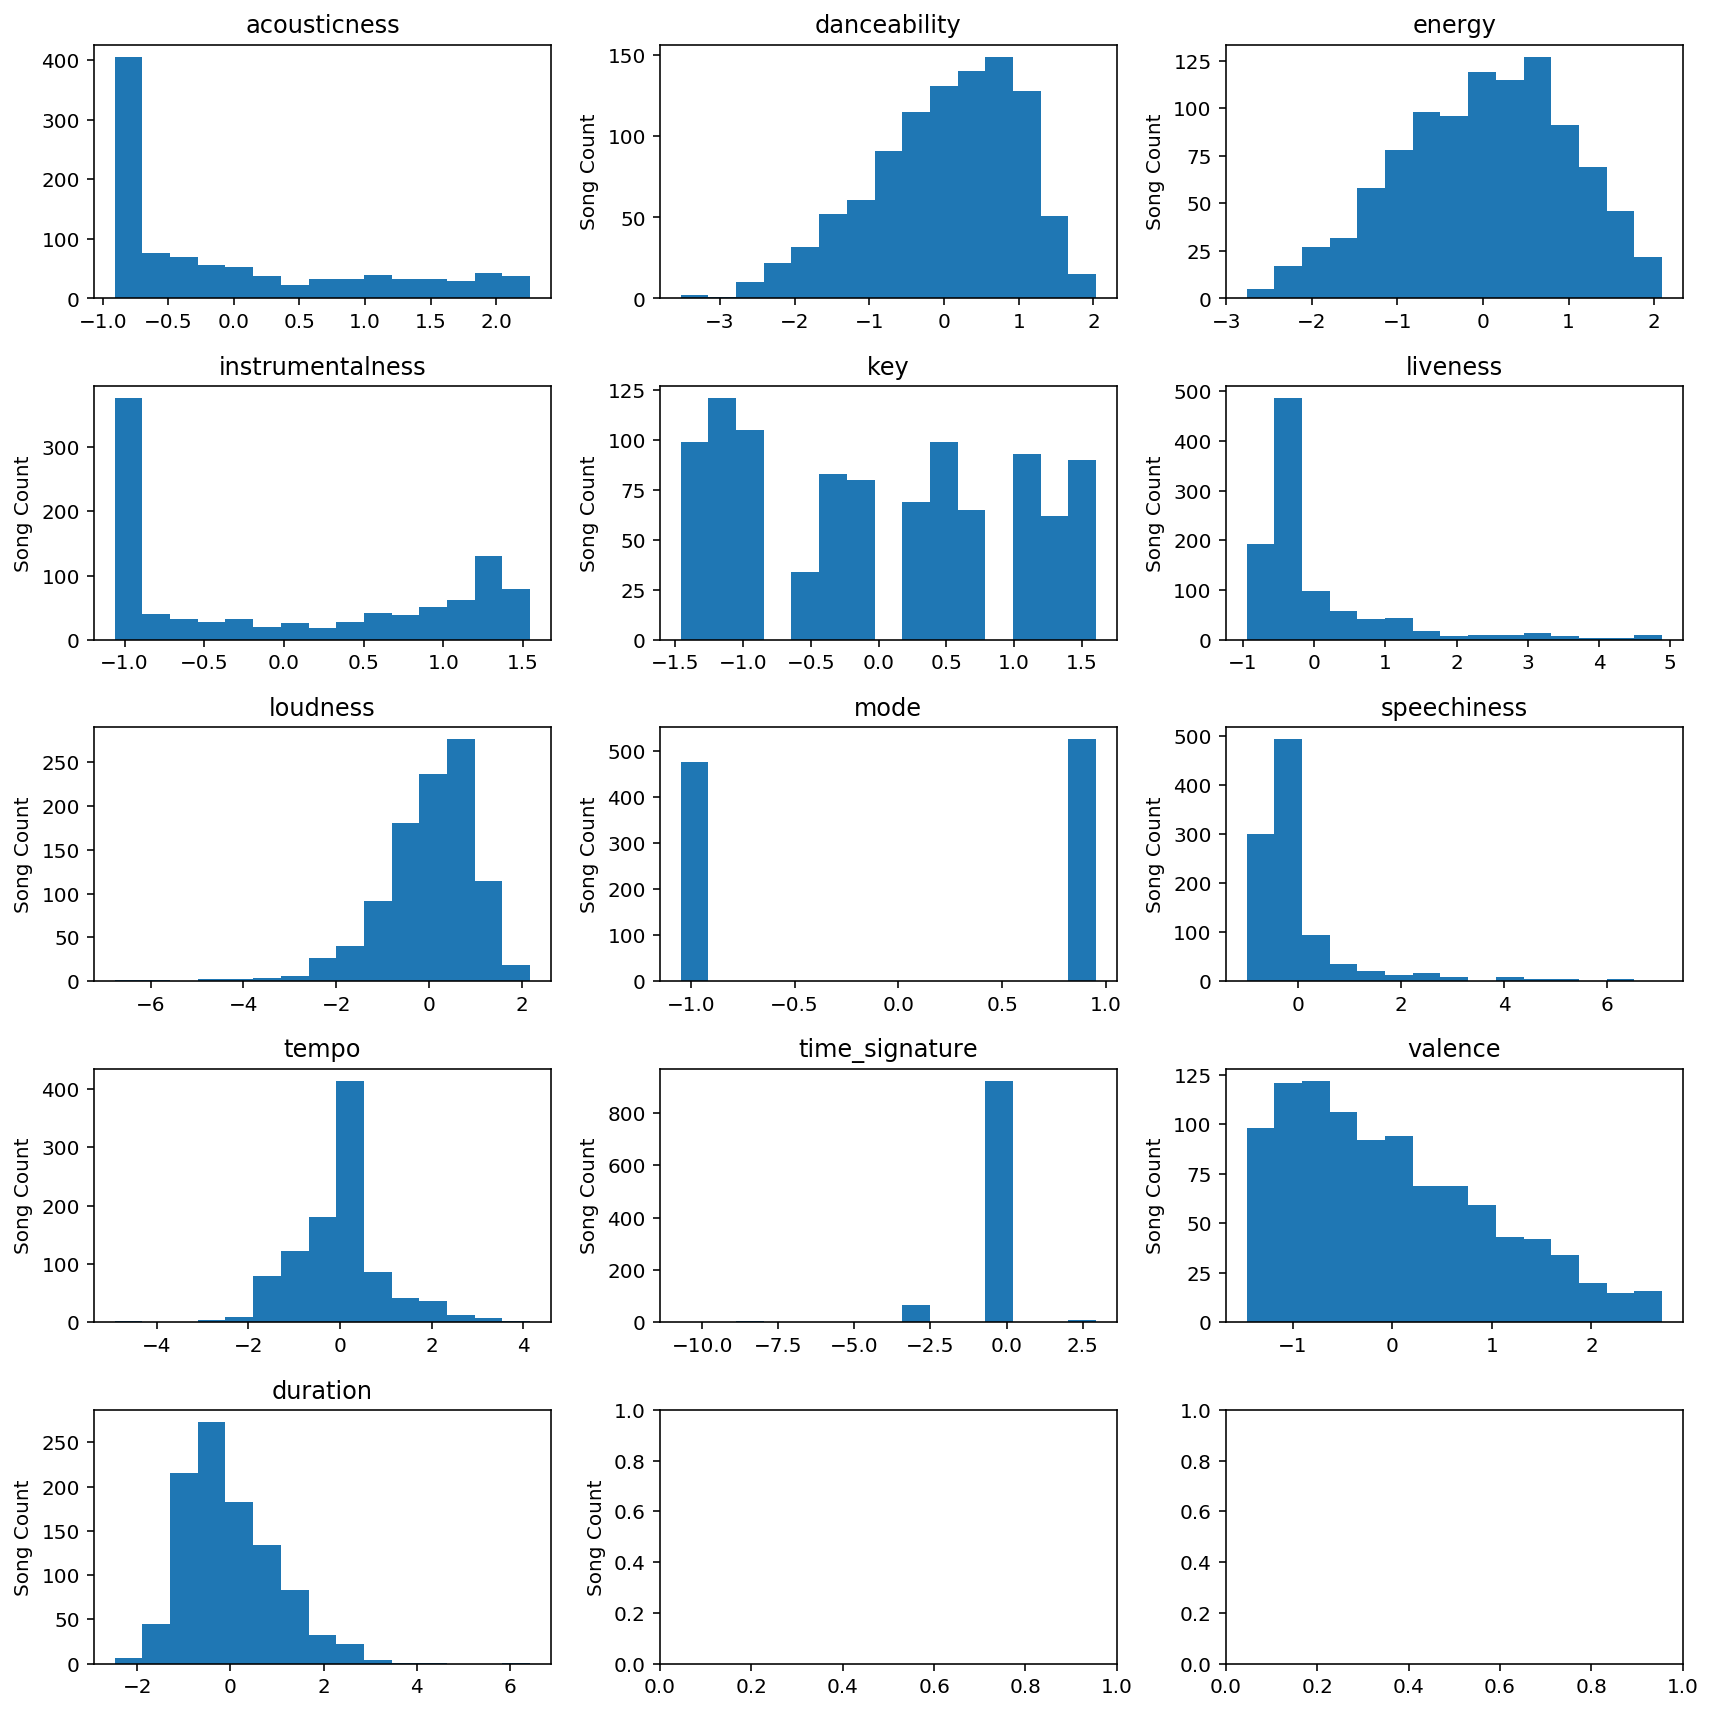

In [45]:
def standardize(df):
    cols = df.columns
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        
        df[col] = (df[col] - mean) / std
        
    return df

feat_df = standardize(feat_df)
plot_hists(feat_df)

## 2nd Step: Scoring K-Means Clustering
* Finding the optimal number of clusters using Silhouette Score inspection

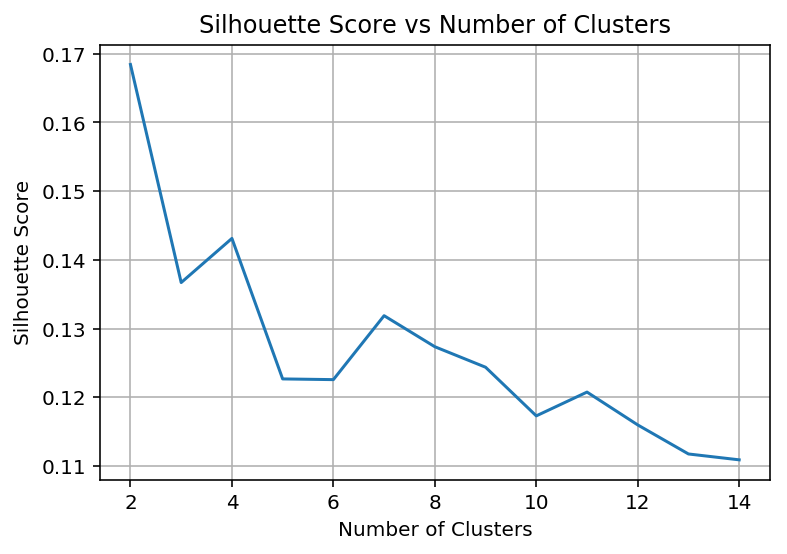

In [47]:
## Finds the opitmal k value
def find_k(data, k):
    sil_scores = []
    for i in range(2, k):
        kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1).fit(data)
        scores = silhouette_score(data, kmeans.labels_)
        sil_scores.append(scores)
        
    return sil_scores 

sils = find_k(X, 15)

plt.title("Silhouette Score vs Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.grid()
plt.plot(range(2, len(sils)+2), sils)

* Peaks at 2, 4, 7
* 7 different groups most intersting (proceed with 7)

### Print the features in order of importance to each cluster

* This looks at cluster centers and uses them to find which feature is the largest (strogest)
* In reality this is not a perfect 1-1 --> Strong does not equal Large but it holds generally.
* Doing this gives us some insight into each clusters characteristics

In [48]:
## Print the top songs from each topic
def print_top_songs(centroid_data, vocab, n_top_words):
    
    ## Getting sorted indexs of feature importance
    sortedX = np.argsort(centroid_data, axis=1)
    
    ## Printing top song features in each 'topic'
    t = {}
    for i, row in enumerate(sortedX[:, -1:-n_top_words-1:-1]):
        t[i] = [vocab[i] for i in row]
        #print("Topic", i,':', ', '.join([vocab[i] for i in row]))
    
    return pd.DataFrame(t)

In [49]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=7, random_state=0, n_jobs=-1).fit(X)

cdf = print_top_songs(kmeans.cluster_centers_, feat_df.columns.values, 15)
cdf

,0,1,2,3,4,5,6
0,liveness,valence,acousticness,instrumentalness,loudness,speechiness,acousticness
1,energy,loudness,time_signature,duration,mode,danceability,mode
2,valence,energy,mode,danceability,energy,loudness,key
3,duration,danceability,key,tempo,tempo,valence,instrumentalness
4,tempo,key,liveness,energy,time_signature,liveness,liveness
5,loudness,time_signature,instrumentalness,time_signature,valence,time_signature,tempo
6,time_signature,tempo,speechiness,key,liveness,key,speechiness
7,speechiness,liveness,tempo,speechiness,speechiness,acousticness,duration
8,mode,speechiness,duration,mode,acousticness,energy,valence
9,instrumentalness,instrumentalness,valence,loudness,duration,mode,loudness


In [50]:
## Printing relative size of each cluster
lbls = kmeans.labels_
for i in range(7):
    print("Topic {0} makes up {1:2.2f}% of song base".format(i, np.mean(lbls == i)*100))

Topic 0 makes up 5.30% of song base
Topic 1 makes up 19.80% of song base
Topic 2 makes up 17.10% of song base
Topic 3 makes up 29.60% of song base
Topic 4 makes up 19.80% of song base
Topic 5 makes up 4.80% of song base
Topic 6 makes up 3.60% of song base


In [102]:
## Converting clusters into list of lists with songs of each cluster together
inds = feat_df.index.values
names = [songs[i]['song_name'] for i in inds]

df = pd.DataFrame(columns=['name', 'label'])   ## Empty df with column titles
df['name'] = names
df['label'] = lbls
df = df.pivot(columns='label', values='name')

tops = []
for vals in df.columns.values:
    top = [i for i in df[vals] if type(i)==type('a')]
    tops.append(top)

In [103]:
def print_nwords(ll, ind, n):
    songs = ll[ind]
    print(np.random.choice(songs, n))
    
print_nwords(tops, 2, 10)

['Warm' 'Orange Evening' 'Gold In The Air' 'So Long, Honey' 'Retrograde'
 'Into The Black' 'Haul (feat. Mohna)' 'Africa'
 "Comptine d'un autre été, l'après-midi" 'Hello My Old Heart']


## Dimensionality Reduction and Plotting

* To see how well clusters are being made
* Just for fun...


Variance explained per principal component:
[0.21525651 0.14479725 0.0984982  0.08430172 0.080452   0.07192763
 0.06746893 0.05949958 0.05685026 0.04113318 0.03477264 0.02958013]


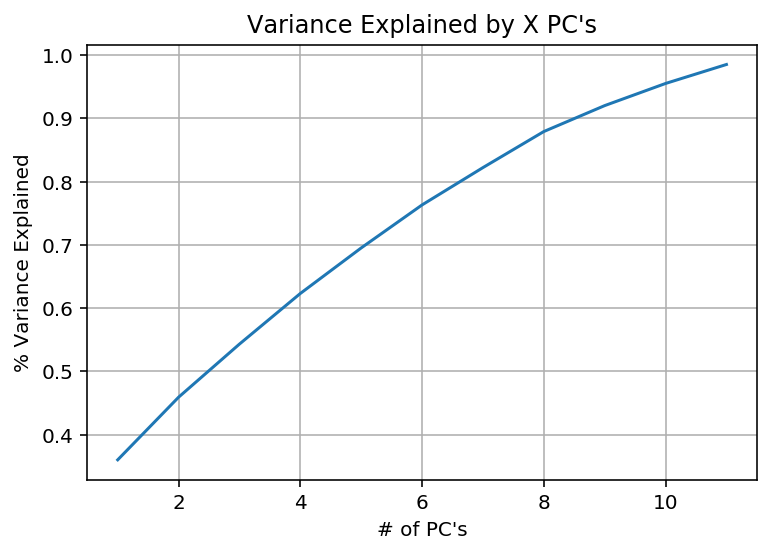

In [53]:
from sklearn.decomposition import PCA

explained = []
for i in range(2, 13):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X)
    var_sum = np.round(np.sum(pca.explained_variance_ratio_), 3)
    explained.append(var_sum)
    #print("% Total Explained Variance by", i, "PC's:", var_sum)
    
print('\nVariance explained per principal component:\n{}'.format(pca.explained_variance_ratio_))

plt.plot(range(1,len(explained)+1), explained)

plt.title("Variance Explained by X PC's")
plt.xlabel("# of PC's")
plt.ylabel("% Variance Explained")
plt.grid()
plt.show()

### Functions for plotting clustered songs in 2D and 3D

In [110]:
## Creating 2D cluster plot using PCA
def twoD_scatter(x, y, lbls):
    cdict = {0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'yellow', 5:'black', 6:'pink', 7:'cyan'}

    plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    for g in np.unique(lbls):
        ix = np.where(lbls == g)
        ax.scatter(x[ix], y[ix], c = cdict[g], label = g, s = 30)
    
    ax.legend()
    plt.show()
    
## Plotly 3D Scatter
def plotly_3d(x, y, z, lbls, sample=True):
    
    if sample:
        samps = np.random.choice(range(len(x)), 700, replace=False)
        x, y, z, lbls = x[samps], y[samps], z[samps], lbls[samps]
    
    trace1 = go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=7,
            color=lbls,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8))

    data = [trace1]
    layout = go.Layout( margin = dict(l=0, r=0, b=0, t=0) )
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='simple-3d-scatter')

### 2D Cluster Plot

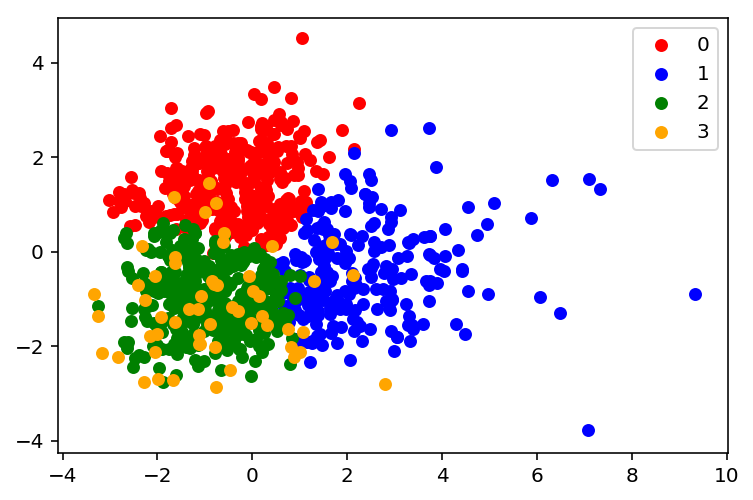

In [113]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1).fit(X)
labls = kmeans.labels_

## Take N random samples from X (random customers)
samps = np.random.choice(range(X.shape[0]), 900, replace=False)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]

lbs = labls
twoD_scatter(pca_df.pca1.values, pca_df.pca2.values, lbs)

### 3D Cluster Plot

In [112]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=7, random_state=0, n_jobs=-1).fit(X)
labls = kmeans.labels_

## Take N random samples from X (random customers)
samps = np.random.choice(range(X.shape[0]), 900, replace=False)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]

lbs = labls
plotly_3d(pca_df.pca1.values, pca_df.pca2.values, pca_df.pca3.values, lbs, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~noahschumacher/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


/Users/nschumacher/anaconda/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Radar Plots of Music Library
* Radar plots of music library and also of generated playlists
* Visually see the "profile" of each cluster.
* Shows strength of each feature in the cluster

In [99]:
def plot_radar(radar_df, categories, titles, overlap=False):
    ## Number of variables
    N = len(categories)
    its = len(titles)

    ## Angle of each cat
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    if overlap:
        
        ## On top of one another
        plt.figure(figsize=(9,9))
        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        ## First axis on top
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([2,6,10], ["1","5","9"], color="grey", size=7)
        plt.ylim(0,13)


        for i in range(1,4):
            ## Add plots:

            # Ind1
            values=radar_df.loc[i].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=titles[i])
            ax.fill(angles, values, 'b', alpha=0.1)

        # Add legend
        plt.title("Vegan/Vegetarian vs Meat")
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.show()

      
    ## If dont overlap
    else:
        
        for i in range(its):
            plt.figure(figsize=(7,7))
            # Initialise the spider plot
            ax = plt.subplot(111, polar=True)

            ## First axis on top
            ax.set_theta_offset(np.pi / 2)
            ax.set_theta_direction(-1)

            # Draw one axe per variable + add labels labels yet
            plt.xticks(angles[:-1], categories)

            # Draw ylabels
            ax.set_rlabel_position(0)
            plt.yticks([2,6,10], ["1","5","9"], color="grey", size=7)
            plt.ylim(0,13)


            ## Add plots:

            # Ind1
            values=radar_df.loc[i].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid')
            ax.fill(angles, values, 'b', alpha=0.1)

            # Add legend
            plt.title(titles[i])
            plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
            plt.show()

In [100]:
## Converting the clusters top categories df in radar plot dataframe.
cols_ns = list(feat_df.columns.values)

rows = []
for col in cdf.columns.values:
    vals = cdf[col].values
    
    row = np.zeros(13)
    for i, val in enumerate(vals):
        ind = cols_ns.index(val)
        row[ind] = int(12-i)
        
    rows.append(row)
   
radar_df = pd.DataFrame(rows, columns=cols_ns)
radar_df

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,0.0,2.0,11.0,3.0,1.0,12.0,7.0,4.0,5.0,8.0,6.0,10.0,9.0
1,1.0,9.0,10.0,3.0,8.0,5.0,11.0,0.0,4.0,6.0,7.0,12.0,2.0
2,12.0,2.0,0.0,7.0,9.0,8.0,1.0,10.0,6.0,5.0,11.0,3.0,4.0
3,0.0,10.0,8.0,12.0,6.0,2.0,3.0,4.0,5.0,9.0,7.0,1.0,11.0
4,4.0,2.0,10.0,0.0,1.0,6.0,12.0,11.0,5.0,9.0,8.0,7.0,3.0
5,5.0,11.0,4.0,0.0,6.0,8.0,10.0,3.0,12.0,2.0,7.0,9.0,1.0
6,12.0,2.0,1.0,9.0,10.0,8.0,3.0,11.0,6.0,7.0,0.0,4.0,5.0


/Users/nschumacher/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



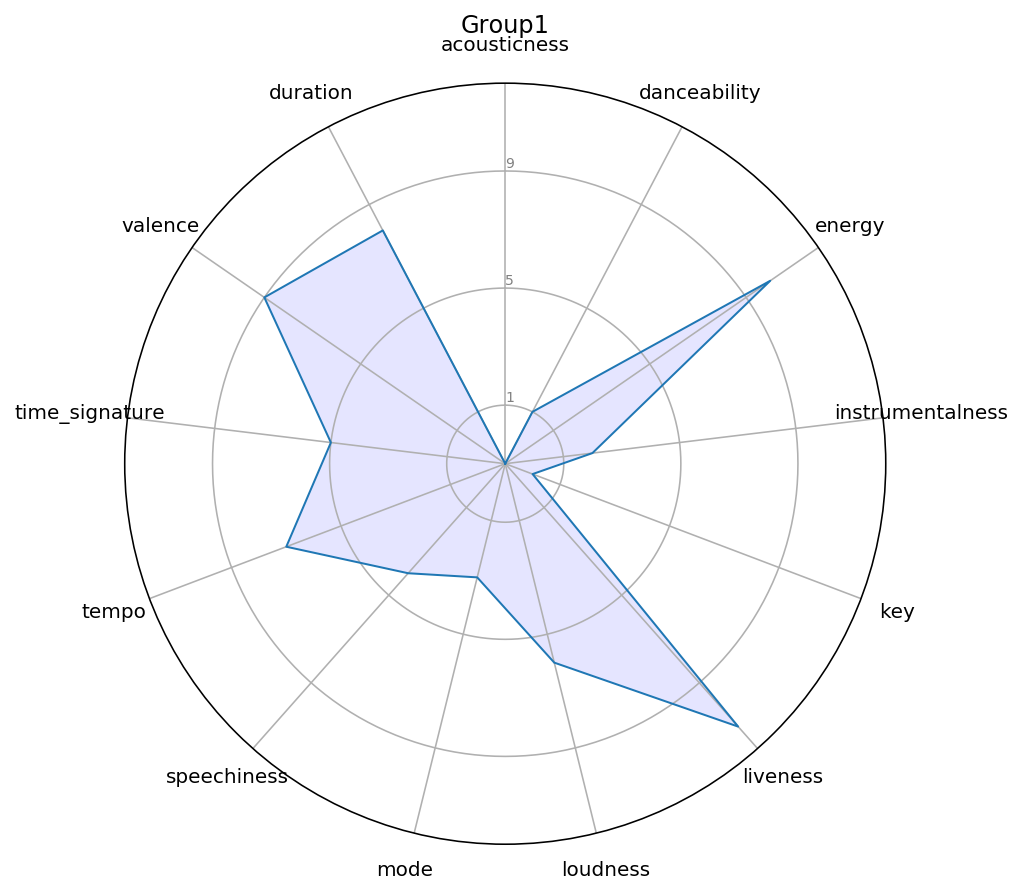

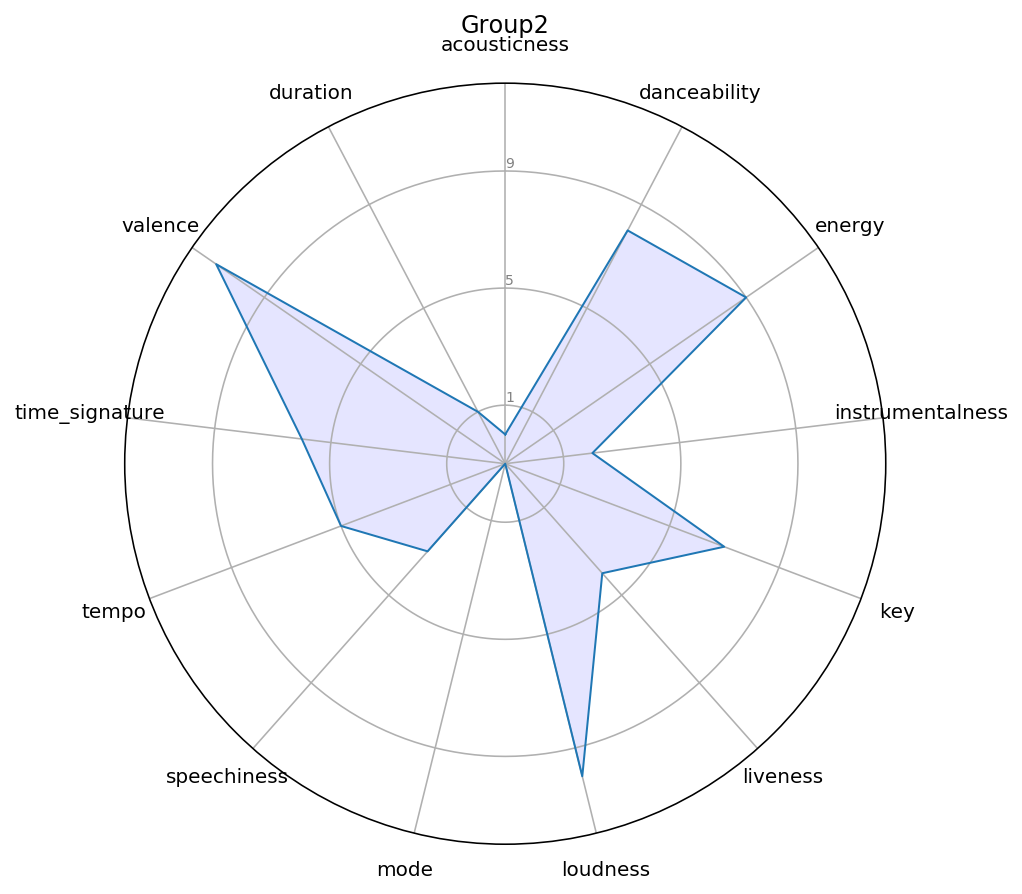

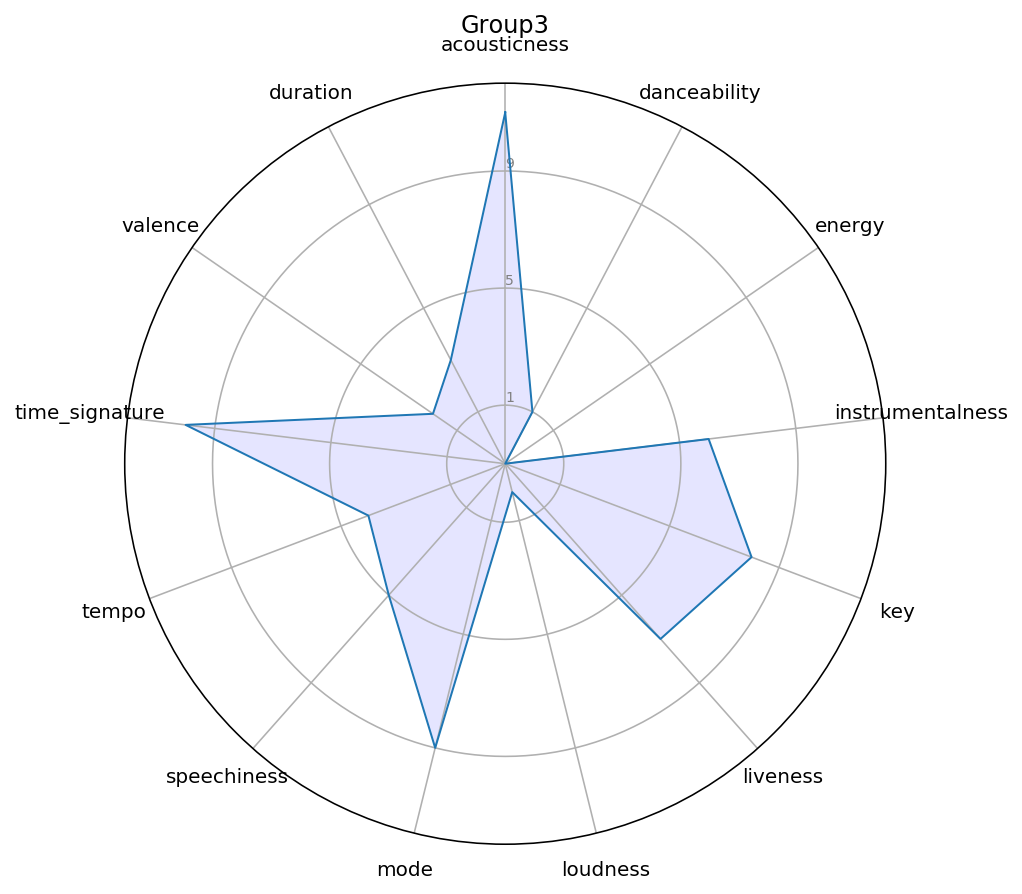

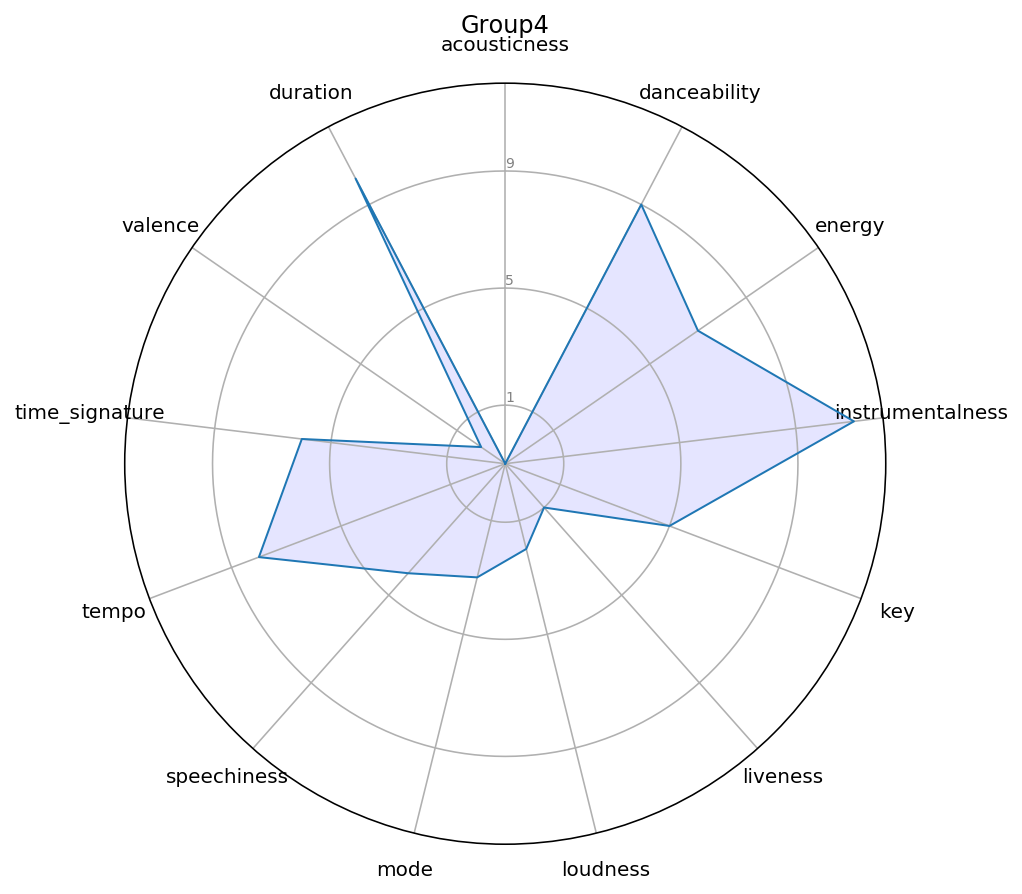

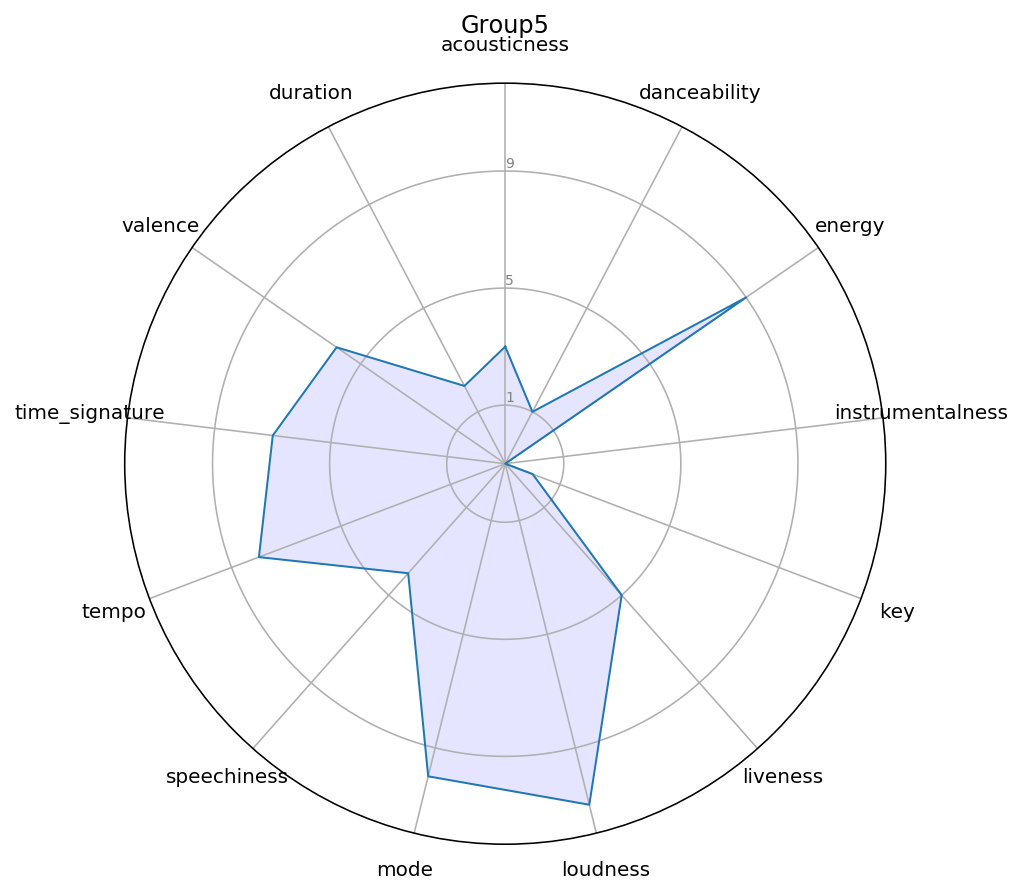

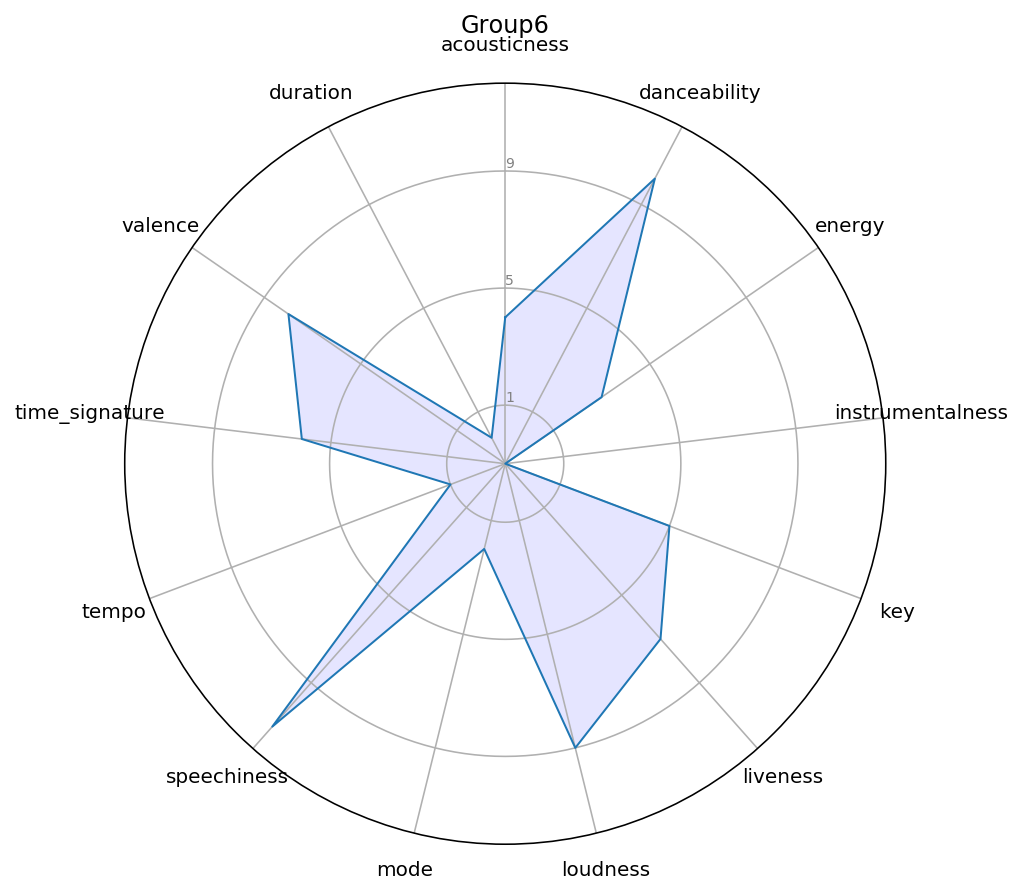

In [101]:
titles = ['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6']
plot_radar(radar_df, cols_ns, titles, overlap=False)